[Link1](https://www.geeksforgeeks.org/decision-tree-implementation-python/)
[Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

# Decision Tree ML Algorithm
* Falls under supervised learning algorithms.

### Gini Index and Information Gain
Both of these methods are used to select from the 'n' attributes of the dataset which attribute would be placed at the root or the internal node

#### Gini Index
* Gini Index is ametric to measure how often a randomly chosen element would be incorrectly identified.
* It means an attribute with lower gini index should be preferred.

#### Entropy
* A measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

#### Information Gain
* The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of change in entropy.

#### Accuracy score
* Used to calculate the accuracy of the trained classifier.

#### Confusion Matrix
* Confusion Matrix is used to understand the trained classifier behavior over the test dataset or calidate dataset.+

# Understanding Confusion Matrix
Nice [article](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) describing confusion matrics 

* It is a performance measurement for machine learning classification problems where output can be two or more classes.
* It is a table with 4 different combinations of predicted and actual values
* It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and AUC-ROC curve.

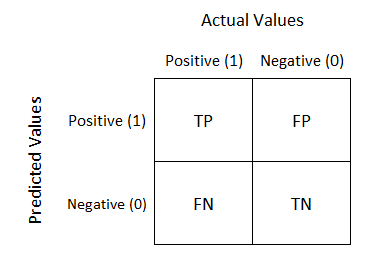

* True Positive (TP):
    * You predicted positive and it's true.
* True Negative (TN):
    * You predicted negative and it's true.
* False Positive (FP) (Type 1 Error):
    * You predicted positive and it's false.
* False Negative (FN) (Type 2 Error):
    * You predicted negative and it's false.

##### We describe predicted values as Postive and Negative and actual values as True and False


In [48]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [2]:
# Load all the training and testing data
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

dt_results = confusion_matrix(y_test, y_pred_dt)
dt_error = zero_one_loss(y_test, y_pred_dt)
dt_score = accuracy_score(y_test, y_pred_dt) * 100
dt_report = classification_report(y_test, y_pred_dt)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [ ]:
# define classifier and fitting data
forest = ExtraTreesClassifier(random_state=1)
forest.fit(X_train, y_train)

In [5]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{dt_results[0]}")
print(f"{dt_results[1]} \n")

print("Report :")
print(dt_report) 

print(f"True Postive   : {dt_results[0][0]}")
print(f"False Positive : {dt_results[0][1]}")
print(f"False Negative : {dt_results[1][0]}")
print(f"True Negative  : {dt_results[1][1]}")
print(f"Error Value    : {dt_error}")
print(f"Accuracy_Score : {dt_score}")
print("=================================================")

Total time: 1958.4521 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[3987265   29405]
[ 42479 782024] 

Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   4016670
           1       0.96      0.95      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 3987265
False Positive : 29405
False Negative : 42479
True Negative  : 782024
Error Value    : 0.014848467509836927
Accuracy_Score : 98.51515324901631


In [59]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(80)

Feature importances sorted:
---------------------------------


Dst Port             2.968386e-01
TotLen Fwd Pkts      2.041877e-01
Fwd Seg Size Min     1.006785e-01
Flow Duration        8.900835e-02
Init Fwd Win Byts    6.619029e-02
Bwd Pkt Len Mean     5.196336e-02
Fwd IAT Tot          4.610163e-02
Fwd Pkts/s           3.675461e-02
Fwd IAT Std          2.826610e-02
Flow IAT Min         1.262151e-02
Fwd IAT Min          1.101272e-02
Bwd Seg Size Avg     7.671256e-03
Fwd IAT Mean         4.649494e-03
Flow IAT Mean        3.314070e-03
Flow IAT Std         3.288945e-03
Bwd Pkt Len Max      3.213752e-03
Fwd Header Len       2.807914e-03
Bwd Pkts/s           2.719091e-03
Flow Byts/s          2.445326e-03
Flow IAT Max         2.392972e-03
Bwd Header Len       2.048026e-03
URG Flag Cnt         1.765139e-03
Flow Pkts/s          1.543857e-03
Fwd IAT Max          1.471446e-03
Fwd Act Data Pkts    1.142426e-03
Bwd IAT Min          1.119433e-03
PSH Flag Cnt         1.093112e-03
Init Bwd Win Byts    1.076159e-03
Bwd IAT Tot          8.600376e-04
Bwd IAT Std   

Top 40 features:
---------------------------------
Dst Port             0.296839
TotLen Fwd Pkts      0.204188
Fwd Seg Size Min     0.100678
Flow Duration        0.089008
Init Fwd Win Byts    0.066190
Bwd Pkt Len Mean     0.051963
Fwd IAT Tot          0.046102
Fwd Pkts/s           0.036755
Fwd IAT Std          0.028266
Flow IAT Min         0.012622
Fwd IAT Min          0.011013
Bwd Seg Size Avg     0.007671
Fwd IAT Mean         0.004649
Flow IAT Mean        0.003314
Flow IAT Std         0.003289
Bwd Pkt Len Max      0.003214
Fwd Header Len       0.002808
Bwd Pkts/s           0.002719
Flow Byts/s          0.002445
Flow IAT Max         0.002393
Bwd Header Len       0.002048
URG Flag Cnt         0.001765
Flow Pkts/s          0.001544
Fwd IAT Max          0.001471
Fwd Act Data Pkts    0.001142
Bwd IAT Min          0.001119
PSH Flag Cnt         0.001093
Init Bwd Win Byts    0.001076
Bwd IAT Tot          0.000860
Bwd IAT Std          0.000848
Fwd Pkt Len Max      0.000847
ACK Flag Cnt       

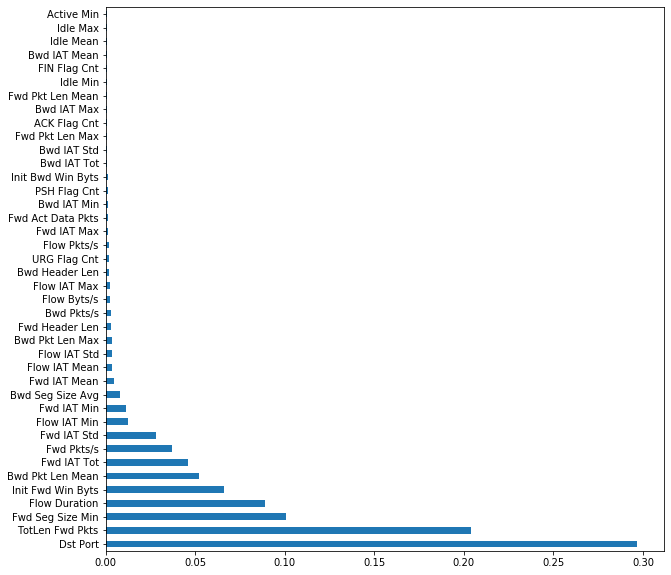

In [61]:
print('Top 40 features:')
print('---------------------------------')
feature_importances_dt.nlargest(40).plot(kind='barh', figsize=(10,10))
print(test.nlargest(40))

Least 40 features:
---------------------------------
Timestamp           0.000000e+00
Bwd PSH Flags       0.000000e+00
Fwd URG Flags       0.000000e+00
Bwd URG Flags       0.000000e+00
Fwd Byts/b Avg      0.000000e+00
Fwd Pkts/b Avg      0.000000e+00
Fwd Blk Rate Avg    0.000000e+00
Bwd Byts/b Avg      0.000000e+00
Bwd Pkts/b Avg      0.000000e+00
Bwd Blk Rate Avg    0.000000e+00
Protocol            5.902511e-07
Fwd PSH Flags       1.839755e-06
SYN Flag Cnt        7.674093e-06
Tot Bwd Pkts        2.705741e-05
Subflow Fwd Pkts    3.063076e-05
Tot Fwd Pkts        3.682048e-05
Pkt Len Min         4.304050e-05
Fwd Pkt Len Min     4.394934e-05
RST Flag Cnt        4.997631e-05
Bwd Pkt Len Min     5.105601e-05
ECE Flag Cnt        6.400995e-05
TotLen Bwd Pkts     1.283226e-04
CWE Flag Count      1.314245e-04
Subflow Bwd Byts    1.469067e-04
Pkt Len Max         1.662292e-04
Fwd Seg Size Avg    1.681641e-04
Active Std          1.904256e-04
Subflow Fwd Byts    1.908873e-04
Pkt Len Var         2.0

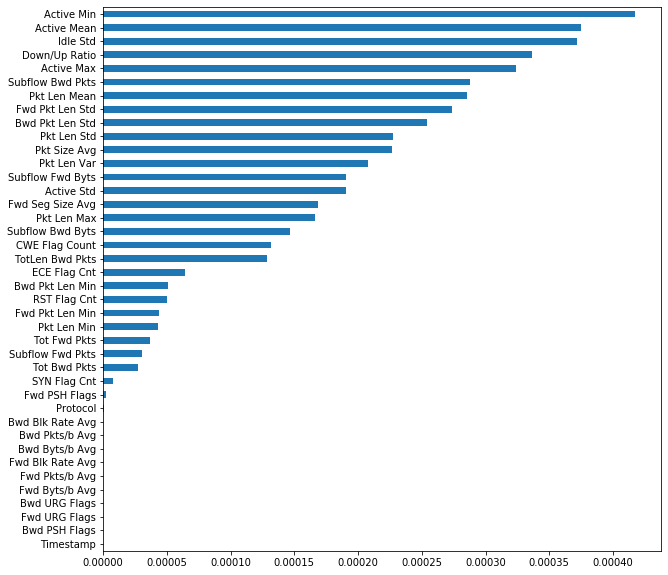

In [62]:
print('Least 40 features:')
print('---------------------------------')
feature_importances.nsmallest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(40))